In [1]:
from utils import rmse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [2]:
 # CRIM     per capita crime rate by town
 # ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 # INDUS    proportion of non-retail business acres per town
 # CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 # NOX      nitric oxides concentration (parts per 10 million)
 # RM       average number of rooms per dwelling
 # AGE      proportion of owner-occupied units built prior to 1940
 # DIS      weighted distances to five Boston employment centres
 # RAD      index of accessibility to radial highways
 # TAX      full-value property-tax rate per $10,000
 # PTRATIO  pupil-teacher ratio by town
 # B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 # LSTAT    % lower status of the population
 # MEDV     Median value of owner-occupied homes in $1000's

feature_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
df = pd.read_csv("housing.csv", sep=r"\s+", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.columns = feature_names
df.columns = df.columns.str.lower()
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
#Check for any correlation accross
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
features = ["age", "lstat", "nox","rm", "medv"]
housing = df[features]
housing.head()

,age,lstat,nox,rm,medv
0,65.2,4.98,0.538,6.575,24.0
1,78.9,9.14,0.469,6.421,21.6
2,61.1,4.03,0.469,7.185,34.7
3,45.8,2.94,0.458,6.998,33.4
4,54.2,5.33,0.458,7.147,36.2


In [8]:
def add_diagonal_line(ax, x, y, color="red", linestyle="--"):
    """Add a diagonal line (y = x) to the scatter plot."""
    min_val = min(min(x), min(y))
    max_val = max(max(x), max(y))
    ax.plot([min_val, max_val], [min_val, max_val], color=color, linestyle=linestyle, label="y = x")
    ax.legend()

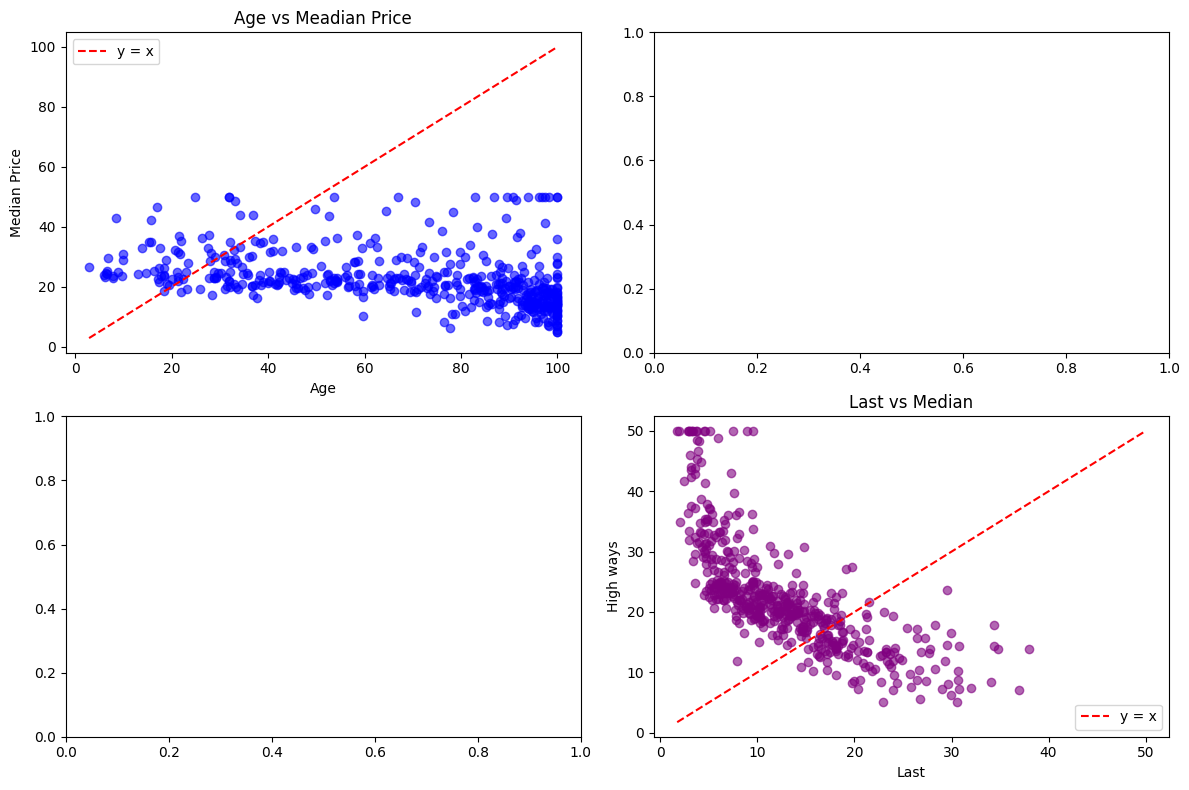

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].scatter(housing["age"], df["medv"], color="blue", alpha=0.6)
add_diagonal_line(axes[0, 0], df["age"], df["medv"])
axes[0, 0].set_title("Age vs Meadian Price")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Median Price")

# axes[0, 1].scatter(housing["tax"], df["medv"], color="green", alpha=0.6)
# add_diagonal_line(axes[0, 1], df["tax"], df["medv"])
# axes[0, 1].set_title("Tax vs Meadian Price")
# axes[0, 1].set_xlabel("Tax")
# axes[0, 1].set_ylabel("Median Price")

axes[1, 1].scatter(housing["lstat"], df["medv"], color="purple", alpha=0.6)
add_diagonal_line(axes[1, 1], df["lstat"], df["medv"])
axes[1, 1].set_title("Last vs Median")
axes[1, 1].set_xlabel("Last")
axes[1, 1].set_ylabel("High ways")

plt.tight_layout()

In [10]:
housing.corr()

,age,lstat,nox,rm,medv
age,1.000000,0.602339,0.731470,-0.240265,-0.376955
lstat,0.602339,1.000000,0.590879,-0.613808,-0.737663
nox,0.731470,0.590879,1.000000,-0.302188,-0.427321
rm,-0.240265,-0.613808,-0.302188,1.000000,0.695360
medv,-0.376955,-0.737663,-0.427321,0.695360,1.000000


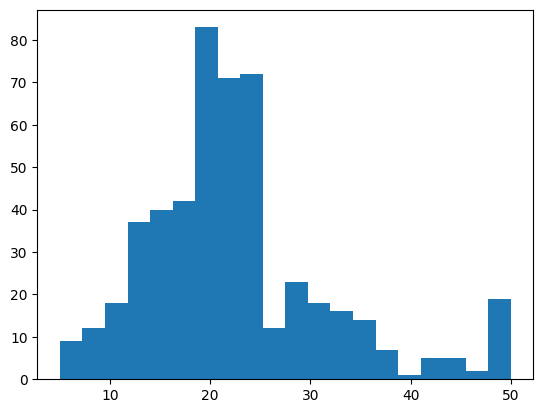

In [11]:
#Check for the corrreclation in 
plt.hist(housing["medv"], bins=20);

In [12]:
housing["medv"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

# Split Data

In [13]:
target = "medv"
y = housing[target]
X = housing.drop(columns=target) 
X.head()

,age,lstat,nox,rm
0,65.2,4.98,0.538,6.575
1,78.9,9.14,0.469,6.421
2,61.1,4.03,0.469,7.185
3,45.8,2.94,0.458,6.998
4,54.2,5.33,0.458,7.147


In [14]:
cut_off = int(len(X) * 0.8)
X_train = X.iloc[:cut_off]
X_test = X.iloc[cut_off:]
y_train = y.iloc[:cut_off]
y_test = y.iloc[cut_off:]

# Baseline model

In [15]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print(y_mean)

24.175742574257427


In [16]:
mae_baseline = mean_absolute_error(y_pred_baseline, y_train)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 24.18
Baseline MAE: 6.8


In [17]:
rmse(y_train, y_pred_baseline)

np.float64(9.249562777628809)

# Build Model

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
try:
    check_is_fitted(model)
    print("Model is fitted.")
except:
    print("Model is not fitted yet.")

Model is fitted.


In [20]:
#Generate prediction base on training data
y_pred_training = model.predict(X_train)

In [21]:
y_pred_training[: 3]

array([29.56982407, 26.08529949, 33.58242638])

In [22]:
mae_training =  mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", mae_training)

Training MAE: 3.81335928497168


In [23]:
rmse(y_train, y_pred_training)

np.float64(5.463250600290608)

In [24]:
#Chec the perfomace on test data
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_training)

Test MAE: 3.81335928497168


In [25]:
rmse(y_test, y_pred_test)

np.float64(6.307351328353597)

In [32]:
item = y_test.iloc[10]
item
#housing.loc[408]

np.float64(7.0)

In [33]:
single_row = X_test.iloc[10:11]
model.predict(single_row)
#single_row

array([-1.41150338])

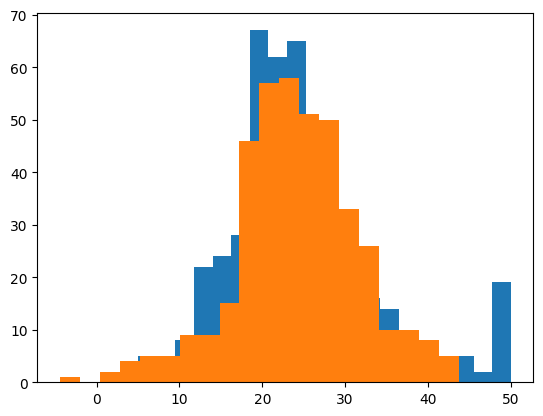

In [28]:
plt.hist(y_train, bins=20);
plt.hist(y_pred_training, bins=20, color="C1");